# Homework

In [1]:
#Handy imports from class

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal



In [2]:
df = pd.read_csv('temperatures/temperature.csv')

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])

### 1. Write a function that efficiently converts every column to a different temperature scale

In [4]:
#Kelvin to Celcius
def kelvinToCelcius(kelvin_df):
    dfCelcius = pd.DataFrame()
    dfCelcius['datetime'] = kelvin_df['datetime']
  
    for column in kelvin_df.columns[1:]:
        dfCelcius[column] = kelvin_df.apply(lambda x:x[column] - 273.15, axis=1)
    
    return dfCelcius


#Kelvin to Fahrenheit 
def kelvinToFahrenheit(kelvin_df):
    dfFahrenheit = pd.DataFrame()
    dfFahrenheit['datetime'] = kelvin_df['datetime'] 
    
    for column in kelvin_df.columns[1:]:
        dfFahrenheit[column] = kelvin_df.apply(lambda x:1.8*(x[column] - 273.15)+32, axis=1)
     
    return dfFahrenheit 

In [5]:
#Convert every column from kelvin to celcius
dfCelcius = kelvinToCelcius(df)
dfCelcius.head(3)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.950000,NaN,NaN,NaN
1,2012-10-01 13:00:00,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,...,12.480000,15.070000,12.68000,14.020000,34.44,32.32,37.430000,31.25,31.25,30.35
2,2012-10-01 14:00:00,11.479041,8.933252,16.324993,8.647217,18.718186,18.383501,20.253141,23.458509,12.004558,...,12.513208,15.097676,12.68465,14.036092,34.44,31.16,37.345769,31.25,31.25,30.35


In [6]:
#Convert every column from kelvin to Fahrenheit
dfFahrenheit = kelvinToFahrenheit(df)
dfFahrenheit.head(3)


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
1,2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.57000,65.696000,65.084000,68.468000,74.210000,53.546000,...,54.464000,59.126000,54.82400,57.236000,93.992,90.176,99.374000,88.25,88.25,86.63
2,2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.56499,65.692734,65.090302,68.455654,74.225315,53.608205,...,54.523774,59.175817,54.83237,57.264966,93.992,88.088,99.222385,88.25,88.25,86.63


In [51]:
#display origin dataframe
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


### 2. Write a function that efficiently fills in missing values in every column, except for trailing NANs.  

That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end

In [50]:
filled_df =  df
for column in filled_df.columns[1:]:
    #Get the records except leading and trailing NaN's
    city_df = filled_df.loc[filled_df[column].first_valid_index():filled_df[column].last_valid_index(),["datetime",column]]
    
    x = city_df['datetime']
    knowns = city_df.loc[~city_df[column].isnull(), ['datetime',column]]
    xp = knowns['datetime']
    fp = np.array(knowns[column])
    
    #Interapolate values
    filled_df[column].loc[filled_df[column].first_valid_index():filled_df[column].last_valid_index()] = np.interp(x, xp, fp)
    
filled_df


C:\Ananonda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Find cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average

In [10]:
# compare each city mean with other city mean and see which city is warmer - use summer_df
# compare each city mean with other city mean and see which city is cold - use winter_df


In [11]:
from datetime import date, datetime

def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'


dfCelcius['datetime'] = pd.to_datetime(dfCelcius['datetime'])
# Find out if date falls on which season
dfCelcius['season'] = dfCelcius.datetime.map(season_of_date)



In [12]:
#Get all summer season records
summer_df = dfCelcius[dfCelcius['season']=='summer']
summer_df.describe()


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
count,470.000000,470.000000,470.000000,469.000000,470.000000,470.000000,470.000000,470.000000,470.00000,470.000000,...,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,22.169301,26.257546,24.388975,23.372810,28.012160,25.067462,36.343509,38.136589,26.85888,24.729466,...,23.920214,24.534276,21.581518,22.219004,18.414222,25.029687,24.110089,26.875433,24.978755,23.051280
std,3.531628,5.072254,3.996746,4.165289,3.160068,2.699785,4.616681,3.965060,4.75236,4.749809,...,3.532881,3.253807,3.756969,3.186230,2.364439,2.048853,3.661356,3.201295,3.322045,3.835317
min,12.820000,13.140000,16.419250,13.560000,19.420000,18.300000,23.314000,23.090000,11.38000,5.966500,...,8.000000,12.500000,7.490000,10.731500,12.381000,14.371000,15.000000,19.440000,15.361000,15.568000
25%,19.832500,22.742500,21.428000,20.300000,25.714375,23.139968,33.006250,35.906309,23.63000,21.730000,...,21.992500,22.732500,19.612500,20.001000,16.758250,24.000000,21.837500,24.440000,23.829750,19.184125
50%,22.199500,26.286409,24.015000,23.320000,27.855000,24.732000,37.220000,38.652098,26.93500,25.060000,...,24.265000,24.695000,21.945000,22.450000,18.168500,25.000000,24.208500,26.994500,25.936000,24.087143
75%,24.637500,29.872500,26.540000,26.080500,29.907500,26.564243,39.488000,40.987500,30.48500,28.280000,...,26.240000,26.497500,24.000000,24.383487,19.932500,26.345000,26.151750,30.000000,27.372750,26.355000
max,33.540000,39.370000,40.100000,34.150000,41.730000,35.020000,45.260000,47.710000,37.60000,35.250000,...,31.490000,33.610000,30.365000,30.190000,24.464000,30.350000,36.000000,33.330000,30.778000,30.390000


In [13]:
#Get all winter season records
winter_df = dfCelcius[dfCelcius['season']=='winter']
winter_df.describe()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
count,43056.000000,43817.000000,43058.000000,43816.000000,43815.000000,43817.000000,43817.000000,43815.000000,43817.000000,43817.000000,...,43815.000000,43058.000000,43815.000000,43815.000000,43053.000000,43058.000000,43059.000000,43053.000000,43054.000000,43058.000000
mean,10.549325,11.628181,14.821732,11.081256,17.498504,16.907083,18.998217,22.056912,12.206218,9.466580,...,12.074216,12.092623,7.000826,10.497421,18.473952,21.391803,23.470474,22.086208,20.933272,20.073635
std,6.574573,7.327072,5.234402,6.456113,6.400619,5.867782,10.761687,9.840888,9.791370,10.633128,...,10.270418,10.244876,11.975620,9.831982,7.890465,6.721972,8.917682,6.366353,6.338178,7.137472
min,-28.000000,-10.780000,-0.850000,-9.370000,-6.646333,-7.366667,-12.588667,-7.091000,-18.107667,-25.422333,...,-22.760000,-22.376000,-29.850000,-23.610000,-0.971000,-2.101000,-2.000000,-2.000000,-4.468000,-0.176000
25%,5.910000,6.587500,11.420000,6.580000,13.100000,12.990000,10.550000,14.293366,4.582000,1.702215,...,4.000000,4.050000,-1.360000,2.804667,12.209000,16.300000,16.621833,17.240000,16.670000,14.344083
50%,10.130000,11.000000,14.310000,10.650000,17.190000,16.760000,18.530000,22.100000,12.640000,9.536000,...,12.530000,12.500000,7.650000,10.810000,17.925000,21.790000,23.169000,21.640000,20.980000,19.945500
75%,15.260000,16.024667,17.600000,15.130000,21.659750,20.750000,27.350000,29.560000,19.379000,17.270000,...,20.500250,20.460000,17.000000,18.351142,24.314333,26.790000,30.347000,26.513000,25.804000,26.000000
max,33.850000,38.750000,40.470000,33.800000,42.320000,40.210000,45.490000,48.070000,39.560000,40.600000,...,34.850000,37.090000,34.730000,34.850000,41.670000,47.780000,47.000000,47.780000,40.000000,43.890000


In [14]:
#1st for loop - loop through all the columns(cities),
#2nd for loop compare city with other cities in the dataframe,except comparing with itself.
#e.g Assume there are these cities A,B,C,D,E
#Compare City A with B,C,D,E
#Compare City B with A,C,D,E 
#Compare City C with A,B,D,E etc.

for i in range(1,len(df.columns)-1):
    for j in range(1,len(df.columns)-1):
        if(i!=j): 
            if((summer_df.iloc[:,i].mean()>summer_df.iloc[:,j].mean()) & 
               (winter_df.iloc[:,i].mean()<winter_df.iloc[:,j].mean())):
                print(df.columns[i],df.columns[j])


Vancouver Beersheba
Portland San Francisco
Portland San Diego
Portland Charlotte
Portland Philadelphia
Portland New York
Portland Beersheba
Portland Tel Aviv District
Portland Eilat
Portland Nahariyya
San Francisco Beersheba
San Francisco Eilat
Seattle Beersheba
Los Angeles Jacksonville
Los Angeles Beersheba
Los Angeles Tel Aviv District
Los Angeles Eilat
Los Angeles Haifa
Los Angeles Nahariyya
San Diego Beersheba
San Diego Tel Aviv District
San Diego Eilat
San Diego Nahariyya
Las Vegas San Antonio
Las Vegas Dallas
Las Vegas Houston
Las Vegas Jacksonville
Las Vegas Miami
Las Vegas Tel Aviv District
Las Vegas Eilat
Las Vegas Haifa
Las Vegas Nahariyya
Phoenix Miami
Phoenix Eilat
Phoenix Haifa
Albuquerque San Francisco
Albuquerque San Diego
Albuquerque Nashville
Albuquerque Atlanta
Albuquerque Charlotte
Albuquerque Beersheba
Albuquerque Tel Aviv District
Albuquerque Eilat
Albuquerque Nahariyya
Denver Vancouver
Denver San Francisco
Denver Seattle
Denver Chicago
Denver Indianapolis
Denver D

In [15]:
#Pick city Saint Louis and San Diego and check if Saint Louis is warmer and colder than San Diego
print(summer_df['Saint Louis'].mean(),summer_df['San Diego'].mean())
print(winter_df['Saint Louis'].mean(),winter_df['San Diego'].mean())

27.116174750248966 25.067462363121287
13.324407827554607 16.907082549459755


### 4. For the two cities you found in for problem 4 (there are many possible answers), clean up the data via aggregation or rolling averages and plot a clear visual

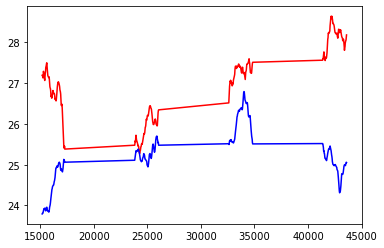

In [16]:
# print the cities in above questions
# pick 2 cities from it
# do the rolling average
#Warm city
# plt rolling average for city A
plt.plot(summer_df['Saint Louis'].rolling(100).mean(),c="red")
# plot rolling average for city B
plt.plot(summer_df['San Diego'].rolling(100).mean(),c="blue")
plt.show()
 

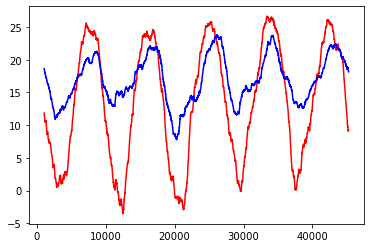

In [17]:
#Colder city
# plot rolling average for city A
plt.plot(winter_df['Saint Louis'].rolling(1000).mean(),c="red")

# plot rolling average for city B
plt.plot(winter_df['San Diego'].rolling(1000).mean(),c="blue")

plt.show()